In [1]:
import numpy as np
import scipy
from scipy import sparse
from scipy.sparse import csr_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import glob
import sys
#import scvi
import gc
import re
from scanpro import scanpro, anova, t_test
from scanpro.linear_model import create_design
from scanpro.get_transformed_props import get_transformed_props

ModuleNotFoundError: No module named 'scanpro'

In [ ]:
spectra_file = '../../test/test123/write/qc_020725.spectra_in.h5ad'

In [ ]:
ctype_map = pd.read_csv("../../sample_info/celltype_map.022125.csv")

In [ ]:
ctype_dict = dict(zip(ctype_map['Tier_1'] + ":" + ctype_map['Tier_3'], ctype_map['Tier_1'] + ":" + ctype_map['Tier_2']))

In [5]:
adata = sc.read_h5ad(spectra_file)

In [6]:
adata.obs['ctype_t2'] = adata.obs['FCluster_names'].apply(lambda x: ctype_dict[x])

In [7]:
adata_ctl = adata[adata.obs['COND']=="CTL"]

In [8]:
coarse_out = scanpro(adata_ctl, clusters_col='Cluster_names', samples_col='FID', conds_col='Ethnicity', transform='logit')

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


In [35]:
fine_out = scanpro(adata_ctl, clusters_col='ctype_t2', samples_col='FID', conds_col='Ethnicity', transform='logit')

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


In [10]:
coarse_out.results.sort_values('adjusted_p_values').head()

,baseline_props,mean_props_CHG,mean_props_Tikari,mean_props_Fulani,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
TRAV1-2- CD8+ T cells,0.196561,0.259971,0.197444,0.182906,15.828978,5.209047e-07,0.000005
B cells,0.084362,0.058948,0.099483,0.086193,13.959251,2.532196e-06,0.000011
MAIT cells,0.007047,0.003313,0.005891,0.009086,12.559600,8.441691e-06,0.000020
NK cells,0.092747,0.082206,0.129385,0.074312,12.522610,8.716747e-06,0.000020
CD4+ T cells,0.568071,0.541000,0.504466,0.605569,11.710612,1.767766e-05,0.000032


In [38]:
fine_out.results.sort_values('adjusted_p_values').head(25)

,baseline_props,mean_props_CHG,mean_props_Tikari,mean_props_Fulani,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
NK cells:CD56dim CD57-,0.020102,0.009066,0.027803,0.019105,45.885935,1.110223e-16,3.108624e-15
NK cells:CD56dim CD57+,0.034878,0.046598,0.056590,0.013736,36.850013,6.050715e-14,8.471002e-13
B cells:Naive,0.036122,0.017300,0.039536,0.041942,24.443945,5.108152e-10,4.767608e-09
Myeloid cells:Non-classical monocytes,0.003898,0.002743,0.006369,0.002153,15.438759,7.185947e-07,5.030163e-06
TRAV1-2- CD8+ T cells:NKT-like,0.009025,0.013429,0.013107,0.005317,13.263671,4.576221e-06,2.562684e-05
MAIT cells:MAIT cells,0.007047,0.003313,0.005891,0.009086,12.556763,8.428915e-06,3.933494e-05
NK cells:CD56dim CD57low,0.022677,0.013726,0.026491,0.026906,12.213044,1.136235e-05,3.976821e-05
B cells:Transitional,0.001377,0.000429,0.001674,0.001335,12.283681,1.068503e-05,3.976821e-05
B cells:Memory,0.025904,0.019949,0.032943,0.023262,10.214407,6.593545e-05,2.051325e-04


In [29]:
adata_ctl_cd4t = adata_ctl[adata_ctl.obs['Cluster_names']=="CD4+ T cells"]

In [28]:
adata_ctl_b = adata_ctl[adata_ctl.obs['Cluster_names']=="B cells"]

In [30]:
adata_ctl_b.obs['ctype_t2'].value_counts()

B cells:Naive           28586
B cells:Memory          20500
B cells:Switched        12851
B cells:CD5+             2722
B cells:Transitional     1090
B cells:Activated         712
B cells:Plasmablasts      301
Name: ctype_t2, dtype: int64

In [22]:
cd4t_out = scanpro(adata_ctl_cd4t, clusters_col='ctype_t2', samples_col='FID', conds_col='Ethnicity', transform='logit')

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


In [31]:
b_out = scanpro(adata_ctl_b, clusters_col='ctype_t2', samples_col='FID', conds_col='Ethnicity', transform='logit')

[INFO] There are more than 2 conditions. ANOVA will be performed...
[INFO] Done!


In [32]:
b_out.results.sort_values('adjusted_p_values').head(25)

,baseline_props,mean_props_Tikari,mean_props_CHG,mean_props_Fulani,f_statistics,p_values,adjusted_p_values
clusters,,,,,,,
B cells:Naive,0.428178,0.389342,0.272551,0.470633,22.064486,3.315227e-09,2.320659e-08
B cells:Memory,0.307061,0.333599,0.356111,0.280957,7.909884,5.266938e-04,1.843428e-03
B cells:Transitional,0.016327,0.016298,0.009396,0.015568,7.102955,1.102619e-03,2.572777e-03
B cells:Switched,0.192490,0.201741,0.281328,0.181339,6.169657,2.613424e-03,4.573492e-03
B cells:CD5+,0.040772,0.042573,0.055647,0.037343,3.676921,2.742445e-02,3.839423e-02
B cells:Activated,0.010665,0.010853,0.018773,0.009501,1.036006,3.571959e-01,4.167286e-01
B cells:Plasmablasts,0.004509,0.005593,0.006195,0.004658,0.194754,8.232281e-01,8.232281e-01


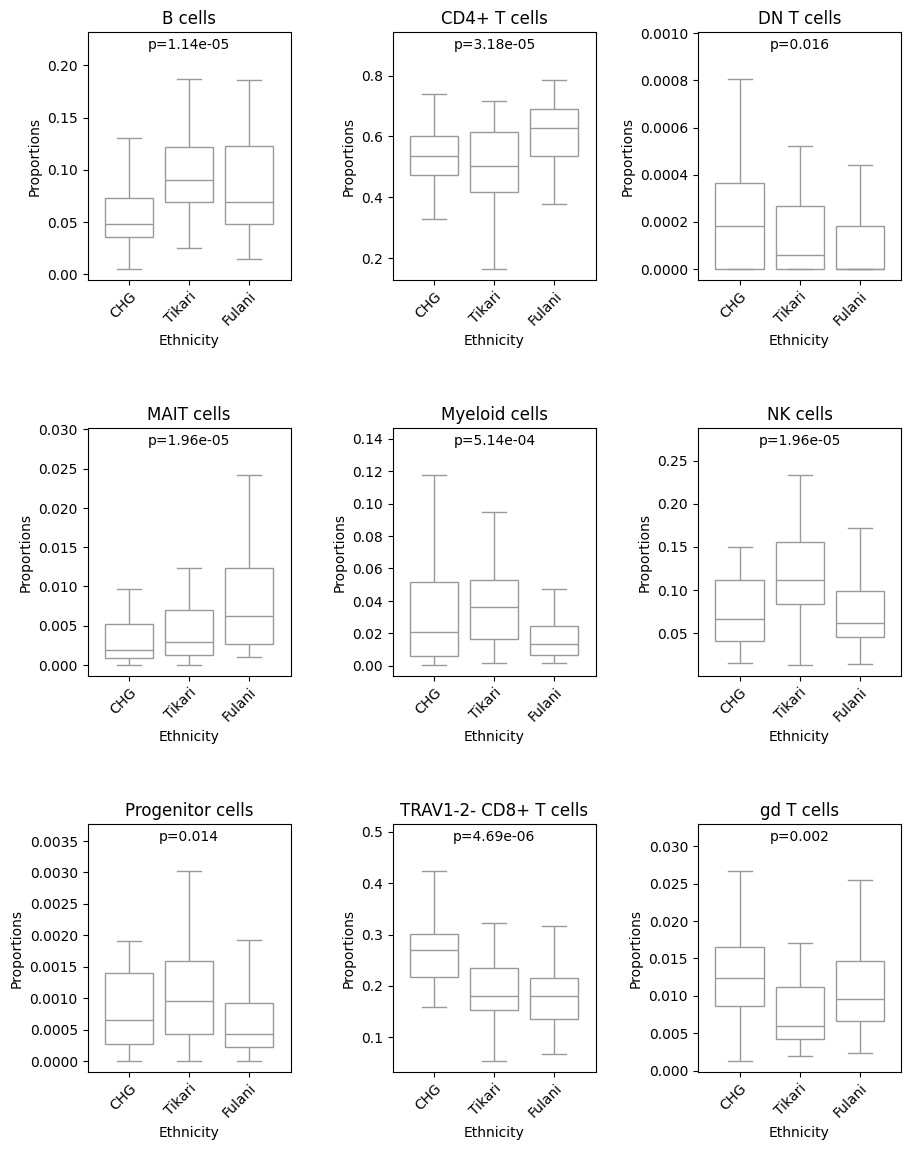

In [11]:
coarse_out.plot(kind="boxplot")